# Introduction to Data Mining
## Practical 3 excercises

### Part 1: Planning
1\. The owner of a shop selling products for kitchen renovations, her name is Lin, decides that she should extend the range of products she offers to also sell homeware products (e.g. decorations, baskets, glassware, pictures etc). Having had success using customer data to build predictive models to guide direct mail campaigns for special product offers, she considers that data mining could help her to identify a subset of customers who should be good prospects for the new set of products. Is Lin ready to solve this as a supervised learning problem? What would you suggest as the target variable? Be precise. Is there anything else that you would recommend that Lin do to achieve her business goal? 

This is a superviesd learning problem. The target could be whether the customer is a good prospects for the new products. The value is whether yes or no. Maybe Lin can divide the new products into several catagories: daily using, decorations...and make a predictive model for each kind of products. 

***

### Part 2: Evaluation Metrics
Answer each of the following questions. 

1\. What are problems with using accuracy to evaluate the performance of a model? 

1. Accuracy do not give its confidence when predicting. 
2. Sometimes accuracy only provides the correctness of a model, but in some cases, we concern more about whether the model make a mistake.

2\. Describe k-fold cross validation. What are some of it's advantages when compared to a simple, single hold-out data set. Are there any disadvantages you can think of? 

1. divide the data set in to k parts
2. use k-1 segments to train the model and use the rest one as the test data
3. at last, return the mean value of k-1 trainning results

***

### Part 2: Data

The data consists of a mail response data set from a direct marketing campaign. It is located in `data/mailing.csv`. Each record (row) refers to an individual who was targeted with a direct marketing offer. The offer was for the individual to make a charitable donation. 

The columns (features/attributes) are as follows:

```
Col.  Name      Description
----- --------- ----------------------------------------------------------------
1     income    household income
2     Firstdate data assoc. with the first gift by this individual
3     Lastdate  data associated with the most recent gift 
4     Amount    average amount by this individual over all periods (incl. zeros)
5     rfaf2     frequency code
6     rfaa2     donation amount code
7     pepstrfl  flag indicating a star donator
8     glast     amount of last gift
9     gavr      amount of average gift
10    class     one if they gave in this campaign and zero otherwise.
```

In this practical the goal is to build a model to predict if people will give to the charitable cause during the current campaign (this is the attribute `"class"` which has a value of 1 if they gave money and 0 if they did not).

First read the data in and put the target variable in `Y` and the features in `X`.

In [1]:
import pandas as pd

# Read data using pandas
data = pd.read_csv("data/mailing.csv")

# Split into X and Y
X = data.drop(['class'], 1)
Y = data['class']

### Modelling and Learning Curve

Create a decision tree (use entropy) and fit it and use it on **all** of the data.

In [2]:
# Import decision trees and logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Import train, test, and evaluation functions
from sklearn.metrics import accuracy_score

# Create an object to learn the classifier (it is not fitted or learned at this stage)
tree = DecisionTreeClassifier(criterion="entropy")

# Fit the model
tree.fit(X, Y)

# Get prediction on all data
Y_predicted = tree.predict(X)

# Get the accuracy over the dataset and compare to the actual points
accuracy = accuracy_score(Y_predicted, Y)

# Print the accuracy
print ("The accuracy is " + str(accuracy))

The accuracy is 0.995646030066


That's high accuracy... It may be overfitting to the data because no training data was used - test if the model performs on unseen data not used in training.

Create train and test sets of `X` and `Y` where we assign 70% of our data to training (ie 100 - 30 % for test).

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

Fit model just to training data

In [4]:

tree = DecisionTreeClassifier(criterion="entropy")

# Fit the tree on the training data
tree.fit(X_train, Y_train)

# Get a prediction from the tree on the test data
Y_test_predicted = tree.predict(X_test)

# Get the accuracy of this prediction
accuracy = accuracy_score(Y_test_predicted, Y_test)

# Print the accuracy
print ("The accuracy is " + str(accuracy))

The accuracy is 0.900736955539


Big difference - almost 10 percent. Which tree would you trust more to make predictions?

## Team Problem

Work in your project teams to answer this question.

Using the following code as a template try to measure the performance with different training data set sizes for the decision tree and a logistic regression model. 

Check the accuracy with percentages from 20% test data to 80% test data. 

Generate a plot that has percentages on the x-axis and accuracies on the y-axis. This is called a **learning curve**.

In [5]:
# Import matplotlib for plotting
import matplotlib.pylab as plt
%matplotlib inline

#### Learning curve

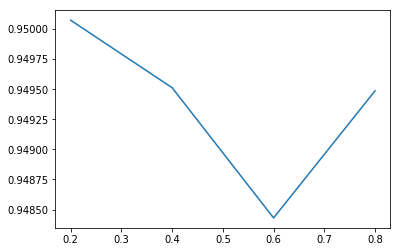

In [9]:
# Here are some percentages to get you started. Feel free to try more!
test_percentages = [0.80, 0.60, 0.40, 0.20]
accuracies = []

for training_percentage in test_percentages:
    # Here I am training on 70%. What should I change this to so that I can try many percentages?
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= training_percentage)

    # This will create an empty logistic regression
    logistic = LogisticRegression()
    
    # This will fit/train your logistic regression
    logistic.fit(X_train, Y_train)
    
    # This will get predictions
    Y_test_predicted = logistic.predict(X_test)
    
    # With these predictions we can get an accuracy. Where should we store this accuracy?
    accuracies.append(accuracy_score(Y_test_predicted, Y_test))

# We want to plot our results. What list should we use for the x-axis? What about the y-axis?
plt.plot(test_percentages,accuracies)
plt.show()

#### Fitting curve

Generate a fitting curve by controlling the model complexity - tree depth.

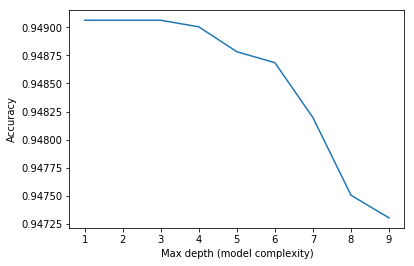

In [12]:
# Let's fit our training data size to 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.80)

# Let's try different max depths for a decision tree
max_depths = range(1, 10)
accuracies = []

for max_depth in max_depths:
    # This will create an empty decision tree at a specified max depth
    tree = DecisionTreeClassifier(max_depth=max_depth)
    
    # This will fit/train your tree
    tree.fit(X_train, Y_train)
    
    # This will get accuracy and keep track of it
    Y_test_predicted = tree.predict(X_test)
    accuracies.append(accuracy_score(Y_test_predicted, Y_test))

# We want to plot our results
plt.plot(max_depths, accuracies)
plt.ylabel("Accuracy")
plt.xlabel("Max depth (model complexity)")
plt.show()